# **Sentiment Analysis on Movie Reviews**


Import Librearies

In [1]:
import pandas as pd
import re
import nltk
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
from sklearn.metrics import classification_report, accuracy_score
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Load and Preprocess IMDB Dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/IMDB-Dataset.csv')
df = df[['review', 'sentiment']]
print(df)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


In [4]:
print(df['sentiment'].value_counts())

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [5]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    text = text.lower()
    text = re.sub(r"<.*?>", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['clean_review'] = df['review'].apply(preprocess)

In [6]:
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_review'], df['label'], test_size=0.2, random_state=42
)

In [8]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

Multinominal Naive Bayes Model

In [9]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)


MultinomialNB()

Logistic Regression Model

In [10]:
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

In [11]:
y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8553
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      4961
           1       0.85      0.87      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [12]:
y_pred = model1.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8853
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



Testing with new sentence

In [13]:
new_sentence = ["This movie was fantastic and I loved every minute of it! Highly recommend."]

new_sentence_vec = vectorizer.transform(new_sentence)
prediction = model.predict(new_sentence_vec)
print("The predicted class for the new sentence is:", prediction)
probabilities = model1.predict_proba(new_sentence_vec)
print("The probabilities for each class are:", probabilities)

The predicted class for the new sentence is: [1]
The probabilities for each class are: [[0.07645652 0.92354348]]


In [14]:
new_sentence1 = ["The plot was completely uninspired, and the acting was so wooden it was painful to watch."]

new_sentence_vec1 = vectorizer.transform(new_sentence1)
prediction1 = model1.predict(new_sentence_vec1)
print("The predicted class for the new sentence is:", prediction1)
probabilities1 = model1.predict_proba(new_sentence_vec1)
print("The probabilities for each class are:", probabilities1)

The predicted class for the new sentence is: [0]
The probabilities for each class are: [[0.95888166 0.04111834]]


# Most Frequent Positive and Negative words

In [15]:
positive_reviews = df[df['label'] == 1]['review']
negative_reviews = df[df['label'] == 0]['review']

In [16]:
positive_text = " ".join(review for review in positive_reviews)
negative_text = " ".join(review for review in negative_reviews)


In [17]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

custom_stopwords = set(STOPWORDS)
custom_stopwords.add("movie")
custom_stopwords.add("film")
custom_stopwords.add("movies")
custom_stopwords.add("films")
custom_stopwords.add("one")

positive_wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=custom_stopwords
).generate(positive_text)

negative_wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    stopwords=custom_stopwords
).generate(negative_text)


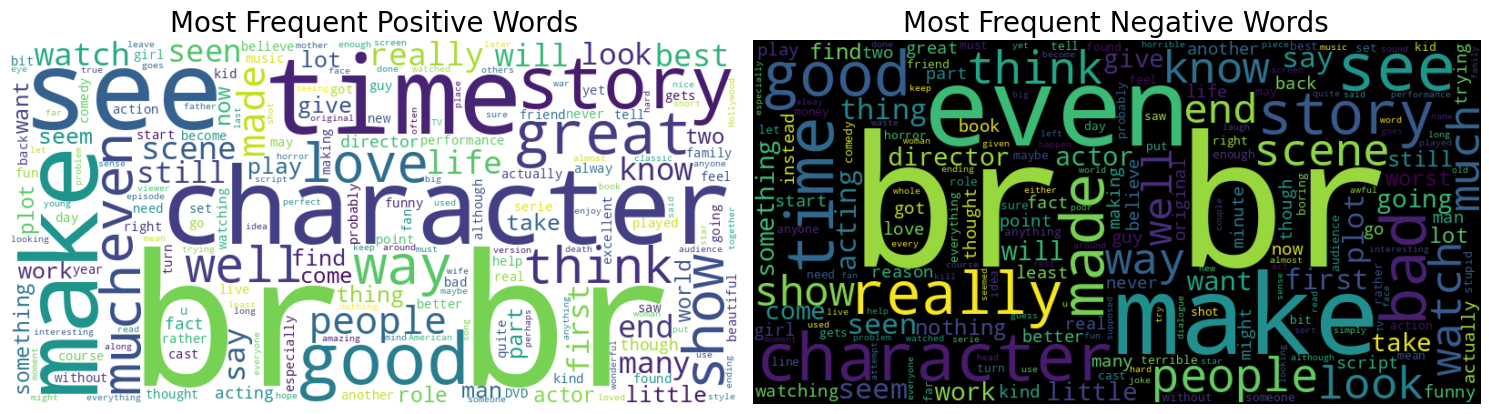

In [18]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Most Frequent Positive Words', fontsize=20)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Most Frequent Negative Words', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.show()